# ESCOLHI ESSE MODELO

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalAveragePooling2D,Conv2D,Dropout,Flatten,Rescaling,Input
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint

import os
import random
import cv2

In [2]:
# Configurar o TensorFlow para usar a GPU
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU is available and configured.")
    except RuntimeError as e:
        print(e)
else:
    print("GPU is not available, using CPU instead.")

print("ok")

GPU is available and configured.
ok


In [27]:
# data_path = r"C:\pastaImagensMangas"
data_path = "MangoLeaf"
img_size = (224,224)
batch_size = 32
mode = "rgb"
epochs = 50

In [28]:
def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path,fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path,file)
            file_paths.append(file_path)
            labels.append(fold)


    file_series = pd.Series(file_paths,name="file_paths")
    label_series = pd.Series(labels,name="labels")

    df = pd.concat([file_series,label_series],axis=1)
    return df

In [29]:
df = df_maker(data_path)

In [30]:
df

,file_paths,labels
0,MangoLeaf\Anthracnose\20211008_124249 (Custom)...,Anthracnose
1,MangoLeaf\Anthracnose\20211008_124250 (Custom)...,Anthracnose
2,MangoLeaf\Anthracnose\20211008_124252 (Custom)...,Anthracnose
3,MangoLeaf\Anthracnose\20211008_124253 (Custom)...,Anthracnose
4,MangoLeaf\Anthracnose\20211008_124256 (Custom)...,Anthracnose
...,...,...
3995,MangoLeaf\Sooty Mould\IMG_20211212_150412 (Cus...,Sooty Mould
3996,MangoLeaf\Sooty Mould\IMG_20211212_150421 (Cus...,Sooty Mould
3997,MangoLeaf\Sooty Mould\IMG_20211212_150513 (Cus...,Sooty Mould
3998,MangoLeaf\Sooty Mould\IMG_20211212_150516 (Cus...,Sooty Mould


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_paths  4000 non-null   object
 1   labels      4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [32]:
train_df,test_val_df= train_test_split(df ,train_size= 0.8, shuffle= True, random_state= 7, stratify=df["labels"])

In [33]:
test_df,val_df= train_test_split(test_val_df ,train_size= 0.5, shuffle= True, random_state= 7, stratify=test_val_df["labels"])

In [34]:
train_df

,file_paths,labels
259,MangoLeaf\Anthracnose\IMG_20211011_153116 (Cus...,Anthracnose
3841,MangoLeaf\Sooty Mould\IMG_20211211_154849 (Cus...,Sooty Mould
2618,MangoLeaf\Healthy\20211231_125103 (Custom).jpg,Healthy
1816,MangoLeaf\Die Back\20211129_163933 (Custom).jpg,Die Back
3197,MangoLeaf\Powdery Mildew\IMG_20211107_115658 (...,Powdery Mildew
...,...,...
3784,MangoLeaf\Sooty Mould\IMG_20211108_123612 (Cus...,Sooty Mould
1777,MangoLeaf\Die Back\20211129_163119 (Custom).jpg,Die Back
2405,MangoLeaf\Gall Midge\IMG_20211106_165541 (Cust...,Gall Midge
856,MangoLeaf\Bacterial Canker\IMG_20211106_142012...,Bacterial Canker


In [35]:
test_df

,file_paths,labels
1086,MangoLeaf\Cutting Weevil\20211011_161244 (Cust...,Cutting Weevil
1559,MangoLeaf\Die Back\20211129_160913 (Custom).jpg,Die Back
3704,MangoLeaf\Sooty Mould\IMG_20211108_123024 (Cus...,Sooty Mould
3252,MangoLeaf\Powdery Mildew\IMG_20211107_122647 (...,Powdery Mildew
2681,MangoLeaf\Healthy\20211231_154828 (Custom).jpg,Healthy
...,...,...
2224,MangoLeaf\Gall Midge\IMG_20211106_163147 (Cust...,Gall Midge
2286,MangoLeaf\Gall Midge\IMG_20211106_163843 (Cust...,Gall Midge
3373,MangoLeaf\Powdery Mildew\IMG_20211107_125029 (...,Powdery Mildew
152,MangoLeaf\Anthracnose\20211011_170712 (Custom)...,Anthracnose


In [36]:
val_df

,file_paths,labels
2202,MangoLeaf\Gall Midge\IMG_20211106_163038 (Cust...,Gall Midge
437,MangoLeaf\Anthracnose\IMG_20211011_164400 (Cus...,Anthracnose
2536,MangoLeaf\Healthy\20211231_123716 (Custom).jpg,Healthy
912,MangoLeaf\Bacterial Canker\IMG_20211106_142844...,Bacterial Canker
440,MangoLeaf\Anthracnose\IMG_20211011_164408 (Cus...,Anthracnose
...,...,...
2076,MangoLeaf\Gall Midge\IMG_20211106_161654 (Cust...,Gall Midge
2473,MangoLeaf\Gall Midge\IMG_20211106_170220 (Cust...,Gall Midge
2253,MangoLeaf\Gall Midge\IMG_20211106_163638 (Cust...,Gall Midge
617,MangoLeaf\Bacterial Canker\IMG_20211106_135036...,Bacterial Canker


In [37]:
df.labels.value_counts()

labels
Anthracnose         500
Bacterial Canker    500
Cutting Weevil      500
Die Back            500
Gall Midge          500
Healthy             500
Powdery Mildew      500
Sooty Mould         500
Name: count, dtype: int64

In [38]:
iplot(px.bar(
    data_frame = df.labels.value_counts().reset_index(),
    x="labels",
    y="count",
    title="Number of images for each class in train data"
))

In [39]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [40]:
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)
test_data = test_datagen.flow_from_dataframe(
    test_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)
val_data = val_datagen.flow_from_dataframe(
    val_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 3200 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.


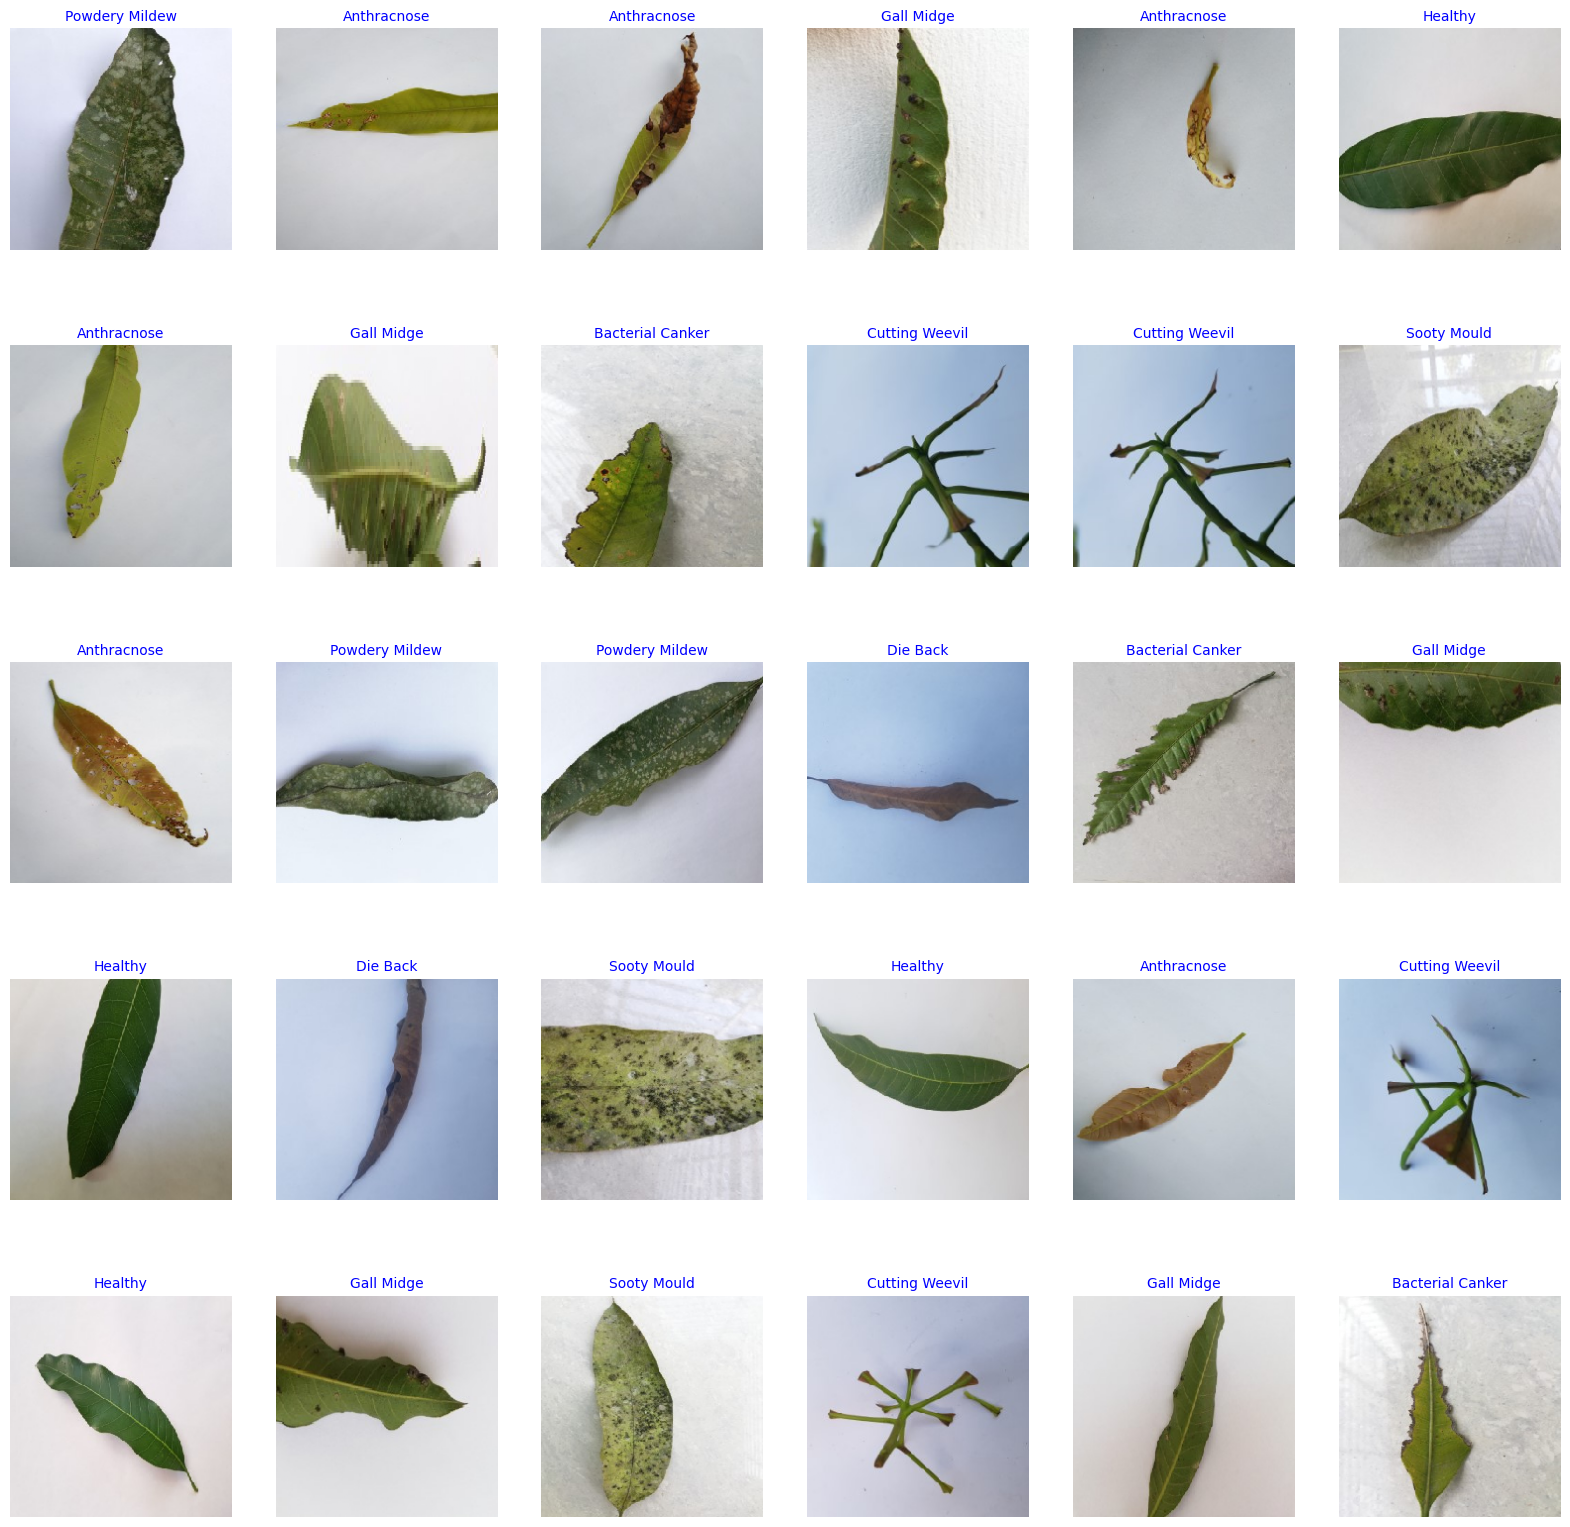

In [41]:
g_dict = train_data.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_data)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 24))

for i in range(30):
    plt.subplot(6, 6, i + 1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 10)
    plt.axis('off')

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import tensorflow as tf

def create_lightweight_model(input_shape, num_classes):
    model = Sequential()

    # Definir explicitamente a camada de entrada
    model.add(Input(shape=input_shape))
    
    # Primeira camada convolucional
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Segunda camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Terceira camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Quarta camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Quinta camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Sexta camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Achatar as saídas das camadas convolucionais
    model.add(Flatten())
    
    # Camada densa com 64 neurônios e ativação ReLU
    model.add(Dense(64, activation='relu'))
    
    # Camada de saída com softmax para classificação
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Parâmetros de entrada e saída
input_shape = (224, 224, 3)
num_classes = len(classes)

# Criar e compilar o modelo
model = create_lightweight_model(input_shape, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [43]:
# Resumo do modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,784 (671.03 KB)

 Trainable params: 171,784 (671.03 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Treinamento do modelo
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)

print("ok")

Epoch 1/50


C:\Users\saulo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 983ms/step - accuracy: 0.2521 - loss: 3.0230 - val_accuracy: 0.5650 - val_loss: 1.1509
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


c:\Python312\Lib\contextlib.py:158: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 646ms/step - accuracy: 0.6645 - loss: 0.9717 - val_accuracy: 0.7025 - val_loss: 0.7825
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 673ms/step - accuracy: 0.8034 - loss: 0.5257 - val_accuracy: 0.8450 - val_loss: 0.3896
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 610ms/step - accuracy: 0.8563 - loss: 0.3742 - val_accuracy: 0.8525 - val_loss: 0.4048
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 590ms/step - accuracy: 0.8952 - loss: 0.3001 - val_accuracy: 0.8875 - val_loss: 0.3190
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 577ms/step - accuracy: 0.9188 - loss: 0.2429 - val_accura

In [47]:
_history_dict = history.history
if not _history_dict:
    vals = pd.DataFrame()  # Create an empty DataFrame if history is empty
else:
    # Find the minimum length of all metric lists.
    # This handles cases where some lists might be empty (len=0), making min_length=0.
    # It assumes all values in _history_dict are iterables for which len() is defined (e.g., lists),
    # which is standard for Keras history.history.
    min_length = min(len(v) for v in _history_dict.values())
    
    # Truncate all lists in the history dictionary to this minimum length.
    # If min_length is 0, all lists in processed_history will become empty.
    processed_history = {key: value[:min_length] for key, value in _history_dict.items()}
    
    # Create the DataFrame from the processed history.
    # If processed_history contains empty lists, an empty DataFrame (with columns but no rows) will be created.
    vals = pd.DataFrame(processed_history)
vals = vals.rename(columns={"loss":"Train Loss","val_loss":"Validation Loss","accuracy":"Train Accuracy","val_accuracy":"Validation Accuracy"})

In [48]:
iplot(px.line(data_frame=vals,
              y = ["Train Loss","Validation Loss"],
              labels={"index":"epochs","value":"loss"},
              title = "Losses",
              template="plotly_dark"))

In [49]:
iplot(px.line(data_frame=vals,
              y = ["Train Accuracy","Validation Accuracy"],
              labels={"index":"epochs","value":"accuracy"},
              title = "Accuracy",
              template="plotly_dark"))

In [50]:
# Salvar o modelo
model.save('models/lcnn_v2.keras')

In [51]:
from tensorflow import keras
# model = keras.models.load_model('modelo_lcnn_versao4.keras')
model = keras.models.load_model('models/lcnn_v2.keras')

In [52]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis = 1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

C:\Users\saulo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 467ms/step


In [53]:
print(classification_report(y_true,y_pred, target_names=class_labels))

                  precision    recall  f1-score   support

     Anthracnose       1.00      0.84      0.91        50
Bacterial Canker       0.86      0.98      0.92        50
  Cutting Weevil       1.00      1.00      1.00        50
        Die Back       1.00      1.00      1.00        50
      Gall Midge       0.98      0.88      0.93        50
         Healthy       0.94      0.94      0.94        50
  Powdery Mildew       0.98      0.92      0.95        50
     Sooty Mould       0.85      1.00      0.92        50

        accuracy                           0.94       400
       macro avg       0.95      0.94      0.95       400
    weighted avg       0.95      0.94      0.95       400



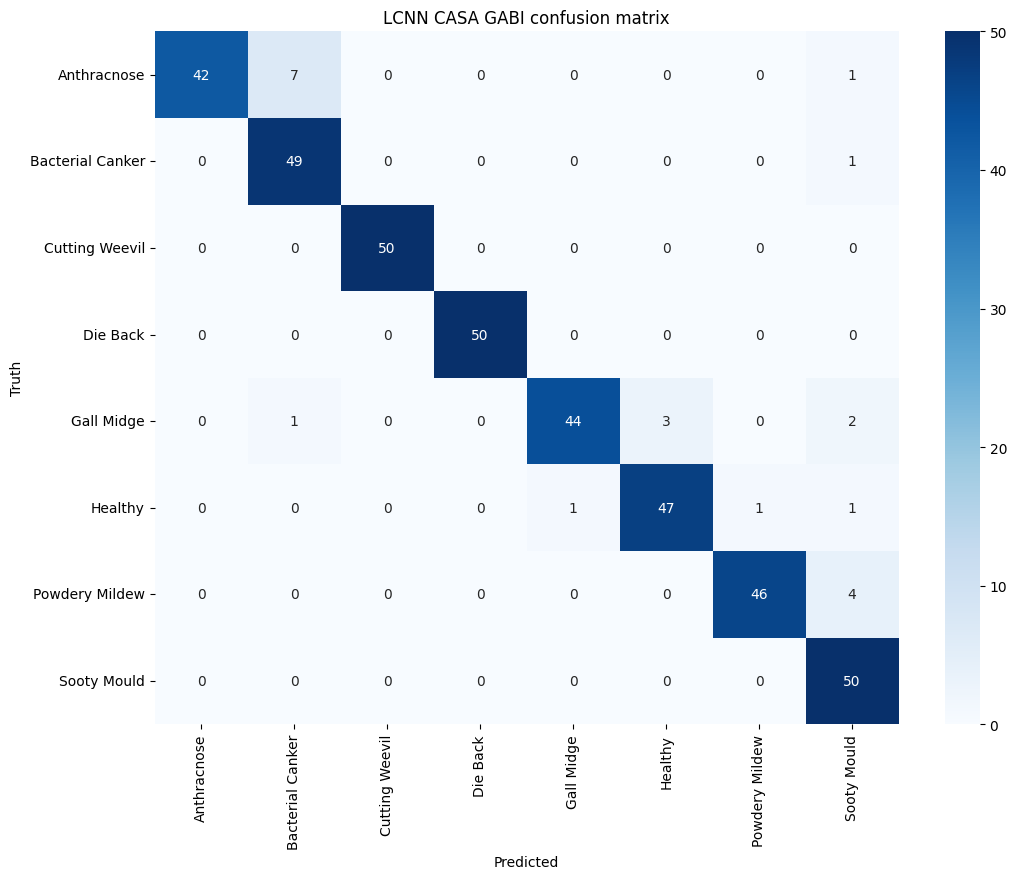

In [54]:
plt.figure(figsize = (12,9))
cm = confusion_matrix(y_true, y_pred)
# sns.heatmap(cm, annot=True,fmt='d',cmap= plt.cm.Blues)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("LCNN CASA GABI confusion matrix")
plt.show()

In [55]:
def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia

nomeDasClasses = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

acuracias = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, 50)

print("Acurácias")
for i in range(0, len(nomeDasClasses)):
    print(nomeDasClasses[i], " - ", acuracias[i])



Acurácias
Anthracnose  -  0.84
Bacterial Canker  -  0.98
Cutting Weevil  -  1.0
Die Back  -  1.0
Gall Midge  -  0.88
Healthy  -  0.94
Powdery Mildew  -  0.92
Sooty Mould  -  1.0


# Avaliando o modelo para os Bancos Corrompidos

Onde vai gerar um classification_report para cada bando e será armazenado em um excel

In [6]:
# Avaliação dos 95 bancos de dados corrompidos (INSERIR CÓDIGO AQUI)
# Função para processar e avaliar cada banco corrompido
import pandas as pd
import numpy as np
import os
from tensorflow import keras

def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia



def df_maker(path):
    file_paths = []
    labels = []

    # Listando as pastas dentro do diretório base (representam as classes)
    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path, fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path, file)
            file_paths.append(file_path)
            labels.append(fold)

    # Criando uma série para caminhos e rótulos
    file_series = pd.Series(file_paths, name="file_paths")
    label_series = pd.Series(labels, name="labels")

    # Concatenando as séries para formar um dataframe
    df = pd.concat([file_series, label_series], axis=1)
    return df



def evaluate_corrupted_model(model, corrupted_data_path, corruption_name):
    # Cria o dataframe com o caminho das imagens e rótulos
    corrupted_df = df_maker(corrupted_data_path)
    
    # Cria o generator para o banco corrompido
    corrupted_datagen = ImageDataGenerator()
    corrupted_data = corrupted_datagen.flow_from_dataframe(
        corrupted_df,
        x_col="file_paths",
        y_col="labels",
        target_size=(224, 224),
        color_mode=mode,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False,
    )

    # Realiza as predições
    predictions = model.predict(corrupted_data)
    y_pred = np.argmax(predictions, axis=1)
    y_true = corrupted_data.classes

    # Calcula e coleta métricas
    report = classification_report(y_true, y_pred, output_dict=True, zero_division = 0)
    report['corruption'] = corruption_name  # Adiciona o nome da corrupção para referência
    
    acuraciaPorClasse = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, ImagensPorClasse=500)

    report['acuraciaPorClasse'] = acuraciaPorClasse
    
    return report

# Para carregar depois
model = keras.models.load_model('models/lcnn_v2.keras')

# base_path = r"C:\criacaoBanco\bancos"
# base_path = r"C:\Users\DESKTOP\pesquisaGabriel\bancosDaPesquisa\bancos"
base_path = "bancos/bancos"


corruption_types = [
    "Brightness", "Contrast", "Defocus Blur", "Elastic", "Fog",
    "Frost", "Gaussian Blur", "Gaussian Noise", "Glass Blur",
    "Impulse Noise", "JPEG", "Motion Blur", "Pixelate", "Saturate",
    "Shot Noise", "Snow", "Spatter", "Speckle Noise", "Zoom Blur"
]

severities = [1, 2, 3, 4, 5]

corrupted_paths = [
    os.path.join(base_path, f"{corruption}_severity_{severity}")
    for corruption in corruption_types
    for severity in severities
]

# Avaliação de todos os bancos
results = []
# Validar caminhos
for path in corrupted_paths:
    if not os.path.exists(path):
        print(f"Aviso: O caminho {path} não existe e será ignorado.")
        continue
    corruption_name = os.path.basename(path).replace("_", " ")
    print(corruption_name)
    report = evaluate_corrupted_model(model, path, corruption_name)
    results.append(report)


# Criar e salvar DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv("results_.csv", index=False)

print("ok")


# # Cria o DataFrame com os resultados para visualização
# results_df = pd.DataFrame(results)
# print(results_df)

Brightness severity 1
Found 4000 validated image filenames belonging to 8 classes.
125/125 [==============================] - 4s 31ms/step
Brightness severity 2
Found 4000 validated image filenames belonging to 8 classes.
125/125 [==============================] - 4s 31ms/step
Brightness severity 3
Found 4000 validated image filenames belonging to 8 classes.
125/125 [==============================] - 4s 31ms/step
Brightness severity 4
Found 4000 validated image filenames belonging to 8 classes.
125/125 [==============================] - 4s 30ms/step
Brightness severity 5
Found 4000 validated image filenames belonging to 8 classes.
125/125 [==============================] - 4s 30ms/step
Contrast severity 1
Found 4000 validated image filenames belonging to 8 classes.
125/125 [==============================] - 4s 29ms/step
Contrast severity 2
Found 4000 validated image filenames belonging to 8 classes.
125/125 [==============================] - 4s 29ms/step
Contrast severity 3
Found 4000 

# Tabela métricas gerais de cada Banco Corrompido e sua severidade

Tabela no excel com as métricas gerais de cada banco

In [10]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
# caminho_arquivo = r"C:\projeto\resultadosDalccnParaCadaBancoModeloEscolhido.xlsx"
caminho_arquivo = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultadosDalccnParaCadaBancoModeloEscolhido_VALIDANDO.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['macro avg', 'accuracy', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar variáveis para somar os valores
somaPrecision = 0
somaRecall = 0
somaF1Score = 0
somaAcuracia = 0

# Criar um novo DataFrame para armazenar os resultados
novodf = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'corruption', 'acuracia'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    try:
        # Converter a string da coluna 'macro avg' em um dicionário
        dicionario = ast.literal_eval(row['macro avg'])
        
        # Somar os valores
        somaPrecision += dicionario['precision']
        somaRecall += dicionario['recall']
        somaF1Score += dicionario['f1-score']
        somaAcuracia += row['accuracy']
        
        # Adicionar uma nova linha ao novo DataFrame
        novalinha = {
            'precision': dicionario['precision'],
            'recall': dicionario['recall'],
            'f1-score': dicionario['f1-score'],
            'corruption': row['corruption'],
            'acuracia': row['accuracy']
        }
        
        # Usar pd.concat para adicionar a nova linha
        novodf = pd.concat([novodf, pd.DataFrame([novalinha])], ignore_index=True)
    
    except (ValueError, SyntaxError):
        # Caso ocorra um erro ao converter a string para dicionário
        print(f"Erro ao processar a linha {index}: {row['macro avg']}")
        continue

# Calcular as médias
total_linhas = len(df)
if total_linhas > 0:
    mediaPrecision = somaPrecision / total_linhas
    mediaRecall = somaRecall / total_linhas
    mediaF1Score = somaF1Score / total_linhas
else:
    mediaPrecision = mediaRecall = mediaF1Score = 0

# Exibir os resultados
print("\nResultado Geral:")
print(f"Precision: {mediaPrecision}")
print(f"Recall: {mediaRecall}")
print(f"f1-score: {mediaF1Score}")
print(f"Acuracia: {somaAcuracia}")

# Exibir o novo DataFrame
print("\nNovo DataFrame:")
print(novodf)

# Salvar o novo DataFrame em um arquivo .xlsx
# caminho_arquivo_saida = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"
caminho_arquivo_saida = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido_VALIDANDO.xlsx"
novodf.to_excel(caminho_arquivo_saida, index=False)
print(f"DataFrame salvo com sucesso em: {caminho_arquivo_saida}")

DataFrame inicial:
    accuracy                                          macro avg  \
0    0.98950  {'precision': 0.9895500295177302, 'recall': 0....   
1    0.95025  {'precision': 0.9526379886598658, 'recall': 0....   
2    0.85600  {'precision': 0.8838255017425722, 'recall': 0....   
3    0.70425  {'precision': 0.8231939212730874, 'recall': 0....   
4    0.60850  {'precision': 0.7957958366887459, 'recall': 0....   
..       ...                                                ...   
90   0.97250  {'precision': 0.973417202806105, 'recall': 0.9...   
91   0.95300  {'precision': 0.9555257134997082, 'recall': 0....   
92   0.92775  {'precision': 0.9341496074560267, 'recall': 0....   
93   0.91075  {'precision': 0.9201067709944498, 'recall': 0....   
94   0.88975  {'precision': 0.9027847290388171, 'recall': 0....   

               corruption  
0   Brightness severity 1  
1   Brightness severity 2  
2   Brightness severity 3  
3   Brightness severity 4  
4   Brightness severity 5  
..      

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_26508\582918115.py:49: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# TABELA GERAL DE AVALIAÇÃO DO MODELO EM RELAÇÃO AOS BANCOS CORROMPIDOS

In [11]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
# caminho_arquivo = r"C:\projeto\resultadosDalccnParaCadaBancoModeloEscolhido.xlsx"
caminho_arquivo = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultadosDalccnParaCadaBancoModeloEscolhido_VALIDANDO.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['0', '1', '2', '3', '4', '5', '6', '7', 'acuraciaPorClasse']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar os dicionários para cada classe
Anthracnose = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
BacterialCanker = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
CuttingWeevil = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
DieBack = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
GallMidge = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
Healthy = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
PowderyMildew = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
SootyMould = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Converter a string da coluna 'macro avg' em um dicionário
    classe0 = ast.literal_eval(row['0'])
    classe1 = ast.literal_eval(row['1'])
    classe2 = ast.literal_eval(row['2'])
    classe3 = ast.literal_eval(row['3'])
    classe4 = ast.literal_eval(row['4'])
    classe5 = ast.literal_eval(row['5'])
    classe6 = ast.literal_eval(row['6'])
    classe7 = ast.literal_eval(row['7'])
    
    # Converter a string da coluna 'acuraciaPorClasse' em uma lista
    classe8 = ast.literal_eval(row['acuraciaPorClasse'])
    
    # Somar os valores para cada classe
    Anthracnose['precision'] += classe0['precision']
    Anthracnose['recall'] += classe0['recall']
    Anthracnose['f1-score'] += classe0['f1-score']
    Anthracnose['acuracia'] += float(classe8[0])  # Converter para float
    
    BacterialCanker['precision'] += classe1['precision']
    BacterialCanker['recall'] += classe1['recall']
    BacterialCanker['f1-score'] += classe1['f1-score']
    BacterialCanker['acuracia'] += float(classe8[1])  # Converter para float
    
    CuttingWeevil['precision'] += classe2['precision']
    CuttingWeevil['recall'] += classe2['recall']
    CuttingWeevil['f1-score'] += classe2['f1-score']
    CuttingWeevil['acuracia'] += float(classe8[2])  # Converter para float
    
    DieBack['precision'] += classe3['precision']
    DieBack['recall'] += classe3['recall']
    DieBack['f1-score'] += classe3['f1-score']
    DieBack['acuracia'] += float(classe8[3])  # Converter para float
    
    GallMidge['precision'] += classe4['precision']
    GallMidge['recall'] += classe4['recall']
    GallMidge['f1-score'] += classe4['f1-score']
    GallMidge['acuracia'] += float(classe8[4])  # Converter para float
    
    Healthy['precision'] += classe5['precision']
    Healthy['recall'] += classe5['recall']
    Healthy['f1-score'] += classe5['f1-score']
    Healthy['acuracia'] += float(classe8[5])  # Converter para float
    
    PowderyMildew['precision'] += classe6['precision']
    PowderyMildew['recall'] += classe6['recall']
    PowderyMildew['f1-score'] += classe6['f1-score']
    PowderyMildew['acuracia'] += float(classe8[6])  # Converter para float
    
    SootyMould['precision'] += classe7['precision']
    SootyMould['recall'] += classe7['recall']
    SootyMould['f1-score'] += classe7['f1-score']
    SootyMould['acuracia'] += float(classe8[7])  # Converter para float

# Criar um DataFrame com os resultados
resultados = pd.DataFrame([Anthracnose, BacterialCanker, CuttingWeevil, DieBack, GallMidge, Healthy, PowderyMildew, SootyMould])

# Dividir cada valor do DataFrame por 95
resultados = resultados / 95

# Exibir o DataFrame com os resultados
print("DataFrame com os resultados (dividido por 95):")
print(resultados)

# Exportar o DataFrame para um arquivo Excel
# caminho_saida = r"C:\projeto\resultados_classes_lcnnModeloEscolhido.xlsx"
caminho_saida = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultados_classes_lcnnModeloEscolhido_VALIDANDO.xlsx"
resultados.to_excel(caminho_saida, index=False)

print(f"Os resultados foram exportados para o arquivo: {caminho_saida}")

DataFrame inicial:
                                                    0  \
0   {'precision': 0.9803921568627451, 'recall': 1....   
1   {'precision': 0.8896797153024911, 'recall': 1....   
2   {'precision': 0.7204610951008645, 'recall': 1....   
3   {'precision': 0.5197505197505198, 'recall': 1....   
4   {'precision': 0.44385026737967914, 'recall': 0...   
..                                                ...   
90  {'precision': 0.9174311926605505, 'recall': 1....   
91  {'precision': 0.8576329331046312, 'recall': 1....   
92  {'precision': 0.7936507936507936, 'recall': 1....   
93  {'precision': 0.764525993883792, 'recall': 1.0...   
94  {'precision': 0.7385524372230429, 'recall': 1....   

                                                    1  \
0   {'precision': 0.9861660079051383, 'recall': 0....   
1   {'precision': 0.8831858407079646, 'recall': 0....   
2   {'precision': 0.6574440052700923, 'recall': 0....   
3   {'precision': 0.4565416285452882, 'recall': 0....   
4   {'preci

# GERAR O GRÁFICO DA AVALIAÇÃO DOS BANCOS

DataFrame inicial:
    f1-score             corruption
0   0.989489  Brightness severity 1
1   0.949832  Brightness severity 2
2   0.854843  Brightness severity 3
3   0.695783  Brightness severity 4
4   0.579703  Brightness severity 5
..       ...                    ...
90  0.972553   Zoom Blur severity 1
91  0.953232   Zoom Blur severity 2
92  0.928345   Zoom Blur severity 3
93  0.911403   Zoom Blur severity 4
94  0.890348   Zoom Blur severity 5

[95 rows x 2 columns]
    corruption  severidade  f1-score
0   Brightness           1  0.989489
1   Brightness           2  0.949832
2   Brightness           3  0.854843
3   Brightness           4  0.695783
4   Brightness           5  0.579703
..         ...         ...       ...
90   Zoom Blur           1  0.972553
91   Zoom Blur           2  0.953232
92   Zoom Blur           3  0.928345
93   Zoom Blur           4  0.911403
94   Zoom Blur           5  0.890348

[95 rows x 3 columns]


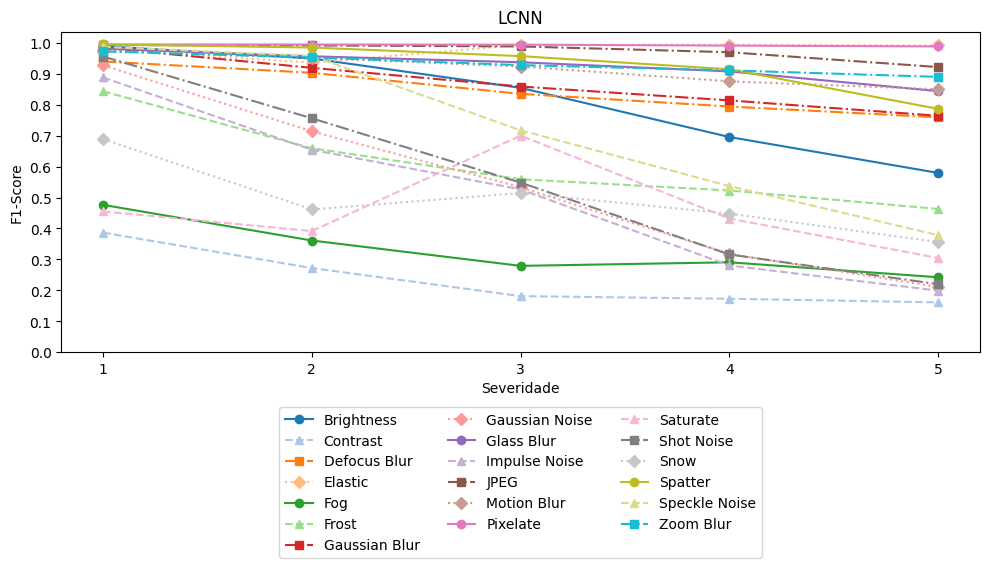

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo .xlsx
# caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"
caminho_arquivo = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido_VALIDANDO.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['f1-score', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

novodf = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # String de exemplo
    string = row['corruption']
    # Dividir a string em uma lista de palavras
    parts = string.split()
    corrupcao = ''
    severidade = 0
    # Verificar se a lista tem exatamente 3 elementos
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])  # Convertendo para inteiro
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])  # Convertendo para inteiro
    
    novodf.loc[index] = [corrupcao, severidade, row['f1-score']]

print(novodf)

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Lista de cores únicas para as linhas (usando uma paleta maior)
cores = plt.cm.tab20.colors  # Usa 20 cores únicas

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf.groupby('corruption')):
    # Ordenar os valores de severidade
    group = group.sort_values(by='severidade')
    
    # Atribuir uma cor única para cada corrupção
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
    
    # Escolher o estilo de linha e marcador alternadamente
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    
    # Plotar o gráfico com a cor única e estilo alternado
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('LCNN')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Adicionar a legenda embaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [13]:
import pandas as pd
import sys

# Caminho do arquivo .xlsx
# caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"
caminho_arquivo = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido_VALIDANDO.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['corruption', 'acuracia']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Criar um novo DataFrame vazio
novodf = pd.DataFrame(columns=['corruption', 'somaDasAcuracia', 'qtdItens'])

# Função para verificar se uma string já existe na coluna 'corruption'
def verifica_corrupcao_existente(df, string):
    """
    Verifica se uma string já existe na coluna 'corruption' do DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame onde a verificação será feita.
    string (str): A string que será verificada.

    Retorna:
    bool: True se a string já existe na coluna 'corruption', False caso contrário.
    """
    return string in df['corruption'].values

def get_prefix_before_severity(text):
    """
    Extrai a parte da string antes da primeira ocorrência de "severity".

    Parâmetros:
    text (str): A string original.

    Retorna:
    str: A parte da string antes de "severity".
    """
    # Divide a string na primeira ocorrência de "severity"
    parts = text.split("severity", 1)
    
    # Retorna a parte antes de "severity" e remove espaços em branco extras
    return parts[0].strip()

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Extrai o prefixo antes de "severity"
    string = get_prefix_before_severity(row['corruption'])
    
    # Verifica se o prefixo já existe no novo DataFrame
    if verifica_corrupcao_existente(novodf, string):
        # Se existir, incrementa a soma das acurácias e a quantidade de itens
        novodf.loc[novodf['corruption'] == string, 'somaDasAcuracia'] += row['acuracia']
        novodf.loc[novodf['corruption'] == string, 'qtdItens'] += 1
    else:
        # Se não existir, adiciona uma nova linha ao DataFrame usando pd.concat
        nova_linha = pd.DataFrame({'corruption': [string], 'somaDasAcuracia': [row['acuracia']], 'qtdItens': [1]})
        novodf = pd.concat([novodf, nova_linha], ignore_index=True)

novodf2 = pd.DataFrame(columns=['corruption', 'acuraciaMediaDasCorrupcoes'])

# Iterar sobre as linhas do DataFrame
for index, row in novodf.iterrows():
        nova_linha = pd.DataFrame({'corruption': [row['corruption']], 'acuraciaMediaDasCorrupcoes': [row['somaDasAcuracia']/row['qtdItens']]})
        novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)
        

novodf2 = novodf2.sort_values(by='acuraciaMediaDasCorrupcoes', ascending=False)

print("Dataframe Final Ordenado:")
print(novodf2)

# Pegar as 3 melhores e as 3 piores corrupções
top_3_melhores = novodf2.head(3)
top_3_piores = novodf2.tail(3)

# Exibir os resultados
print("\n3 melhores corrupções:")
print(top_3_melhores)

print("\n3 piores corrupções:")
print(top_3_piores)

DataFrame inicial:
               corruption  acuracia
0   Brightness severity 1   0.98950
1   Brightness severity 2   0.95025
2   Brightness severity 3   0.85600
3   Brightness severity 4   0.70425
4   Brightness severity 5   0.60850
..                    ...       ...
90   Zoom Blur severity 1   0.97250
91   Zoom Blur severity 2   0.95300
92   Zoom Blur severity 3   0.92775
93   Zoom Blur severity 4   0.91075
94   Zoom Blur severity 5   0.88975

[95 rows x 2 columns]
Dataframe Final Ordenado:
        corruption  acuraciaMediaDasCorrupcoes
12        Pixelate                     0.99300
3          Elastic                     0.97900
10            JPEG                     0.97345
18       Zoom Blur                     0.93075
16         Spatter                     0.92955
8       Glass Blur                     0.92505
11     Motion Blur                     0.91465
6    Gaussian Blur                     0.86785
2     Defocus Blur                     0.84595
0       Brightness            

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_26508\4002845238.py:64: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_26508\4002845238.py:71: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# GERANDO GRÁFICO E G3 Z3 AO MESMO TEMPO

In [43]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Caminho do arquivo .xlsx
# # caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx"
# caminho_arquivo = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido_pcGabi.xlsx"

# # Nome das colunas que você deseja extrair
# colunas_desejadas = ['corruption', 'acuracia', 'f1-score']

# # Ler o arquivo Excel e selecionar as colunas desejadas
# df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# # Exibir o DataFrame com as colunas selecionadas
# print("DataFrame inicial:")
# print(df)

# # Criar um novo DataFrame vazio
# novodf = pd.DataFrame(columns=['corruption', 'somaDasAcuracia', 'qtdItens'])

# # Função para verificar se uma string já existe na coluna 'corruption'
# def verifica_corrupcao_existente(df, string):
#     """
#     Verifica se uma string já existe na coluna 'corruption' do DataFrame.

#     Parâmetros:
#     df (pd.DataFrame): O DataFrame onde a verificação será feita.
#     string (str): A string que será verificada.

#     Retorna:
#     bool: True se a string já existe na coluna 'corruption', False caso contrário.
#     """
#     return string in df['corruption'].values

# def get_prefix_before_severity(text):
#     """
#     Extrai a parte da string antes da primeira ocorrência de "severity".

#     Parâmetros:
#     text (str): A string original.

#     Retorna:
#     str: A parte da string antes de "severity".
#     """
#     # Divide a string na primeira ocorrência de "severity"
#     parts = text.split("severity", 1)
    
#     # Retorna a parte antes de "severity" e remove espaços em branco extras
#     return parts[0].strip()

# # Iterar sobre as linhas do DataFrame
# for index, row in df.iterrows():
#     # Extrai o prefixo antes de "severity"
#     string = get_prefix_before_severity(row['corruption'])
    
#     # Verifica se o prefixo já existe no novo DataFrame
#     if verifica_corrupcao_existente(novodf, string):
#         # Se existir, incrementa a soma das acurácias e a quantidade de itens
#         novodf.loc[novodf['corruption'] == string, 'somaDasAcuracia'] += row['acuracia']
#         novodf.loc[novodf['corruption'] == string, 'qtdItens'] += 1
#     else:
#         # Se não existir, adiciona uma nova linha ao DataFrame usando pd.concat
#         nova_linha = pd.DataFrame({'corruption': [string], 'somaDasAcuracia': [row['acuracia']], 'qtdItens': [1]})
#         novodf = pd.concat([novodf, nova_linha], ignore_index=True)

# # Criar um novo DataFrame para as médias
# novodf2 = pd.DataFrame(columns=['corruption', 'acuraciaMediaDasCorrupcoes'])

# # Iterar sobre as linhas do DataFrame
# for index, row in novodf.iterrows():
#     nova_linha = pd.DataFrame({'corruption': [row['corruption']], 'acuraciaMediaDasCorrupcoes': [row['somaDasAcuracia'] / row['qtdItens']]})
#     novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)

# # Ordenar o DataFrame pela coluna 'acuraciaMediaDasCorrupcoes' em ordem decrescente
# novodf2 = novodf2.sort_values(by='acuraciaMediaDasCorrupcoes', ascending=False)

# # Pegar as 3 melhores e as 3 piores corrupções
# top_3_melhores = novodf2.head(3)
# top_3_piores = novodf2.tail(3)

# # Exibir os resultados
# print("\n3 melhores corrupções:")
# print(top_3_melhores)

# print("\n3 piores corrupções:")
# print(top_3_piores)

# # Criar um DataFrame para o gráfico
# novodf_grafico = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# # Iterar sobre as linhas do DataFrame original
# for index, row in df.iterrows():
#     # String de exemplo
#     string = row['corruption']
#     # Dividir a string em uma lista de palavras
#     parts = string.split()
#     corrupcao = ''
#     severidade = 0
#     # Verificar se a lista tem exatamente 3 elementos
#     if len(parts) == 3:
#         corrupcao = parts[0]
#         severidade = int(parts[2])  # Convertendo para inteiro
#     elif len(parts) == 4:
#         corrupcao = parts[0] + " " + parts[1]
#         severidade = int(parts[3])  # Convertendo para inteiro
    
#     novodf_grafico.loc[index] = [corrupcao, severidade, row['f1-score']]

# # Criar o gráfico
# plt.figure(figsize=(12, 8))

# # Lista de cores únicas para as linhas (usando uma paleta maior)
# cores = plt.cm.tab20.colors  # Usa 20 cores únicas

# # Lista de estilos de linhas e marcadores
# linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
# markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

# # Dicionário para mapear cada corrupção a uma cor única
# cor_mapping = {}
# cor_index = 0

# # Agrupar os dados por corrupção
# for i, (name, group) in enumerate(novodf_grafico.groupby('corruption')):
#     # Ordenar os valores de severidade
#     group = group.sort_values(by='severidade')
    
#     # Atribuir uma cor única para cada corrupção
#     if name not in cor_mapping:
#         cor_mapping[name] = cores[cor_index]
#         cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
    
#     # Escolher o estilo de linha e marcador alternadamente
#     linestyle = linestyles[i % len(linestyles)]
#     marker = markers[i % len(markers)]
    
#     # Plotar o gráfico
#     plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# # Adicionar rótulos e título
# plt.xlabel('Severidade')
# plt.ylabel('F1-Score')
# plt.title('LCNN - Desempenho por Corrupção (Top3 e Bottom3 destacados)')

# # Definir os ticks do eixo x como 1, 2, 3, 4, 5
# plt.xticks([1, 2, 3, 4, 5])

# # Adicionar mais ticks no eixo y
# plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# # Adicionar a legenda embaixo do gráfico
# legenda = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# # Criar uma caixa de texto para o Top 3
# top3_text = "Top3:\n" + "\n".join([f"{row['corruption']}: {row['acuraciaMediaDasCorrupcoes']:.4f}" for index, row in top_3_melhores.iterrows()])
# plt.text(0.9, -0.182, top3_text, transform=plt.gca().transAxes, fontsize=10,
#          verticalalignment='top', horizontalalignment='center',
#          bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

# # Criar uma caixa de texto para o Bottom 3
# bottom3_text = "Z3:\n" + "\n".join([f"{row['corruption']}: {row['acuraciaMediaDasCorrupcoes']:.4f}" for index, row in top_3_piores.iterrows()])
# plt.text(0.9, -0.35, bottom3_text, transform=plt.gca().transAxes, fontsize=10,
#          verticalalignment='top', horizontalalignment='center',
#          bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

# # Adicionar anotações para as 3 melhores corrupções
# for index, row in top_3_melhores.iterrows():
#     corrupcao = row['corruption']
#     media = row['acuraciaMediaDasCorrupcoes']
#     # Encontrar a posição da corrupção no DataFrame do gráfico
#     dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
#     if not dados_corrupcao.empty:
#         # Pegar a última severidade para posicionar a anotação
#         severidade = dados_corrupcao['severidade'].max()
#         f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
#         # Adicionar anotação
#         plt.annotate(f'Top3: {corrupcao}\nMean: {media:.4f}', 
#                      xy=(severidade, f1_score), 
#                      xytext=(severidade + 0.2, f1_score + 0.05), 
#                      arrowprops=dict(facecolor='green', shrink=0.05),
#                      fontsize=9, color='green')

# # Adicionar anotações para as 3 piores corrupções
# for index, row in top_3_piores.iterrows():
#     corrupcao = row['corruption']
#     media = row['acuraciaMediaDasCorrupcoes']
#     # Encontrar a posição da corrupção no DataFrame do gráfico
#     dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
#     if not dados_corrupcao.empty:
#         # Pegar a última severidade para posicionar a anotação
#         severidade = dados_corrupcao['severidade'].max()
#         f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
#         # Adicionar anotação
#         plt.annotate(f'Bottom3: {corrupcao}\nMean: {media:.4f}', 
#                      xy=(severidade, f1_score), 
#                      xytext=(severidade + 0.2, f1_score - 0.1), 
#                      arrowprops=dict(facecolor='red', shrink=0.05),
#                      fontsize=9, color='red')

# # Ajustar o layout para evitar sobreposição
# plt.tight_layout()

# # Mostrar o gráfico
# plt.show()

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_26508\1878220513.py:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_26508\1878220513.py:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




3 melhores corrupções:
   corruption  acuraciaMediaDasCorrupcoes
12   Pixelate                     0.99300
3     Elastic                     0.97900
10       JPEG                     0.97345

3 piores corrupções:
   corruption  acuraciaMediaDasCorrupcoes
13   Saturate                     0.50685
4         Fog                     0.37840
1    Contrast                     0.29545


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


Gráfico salvo em: C:/Users/DESKTOP/pesquisaGabriel/resultadosDasRedes/grafico_lcnnPcGabi_corrupcoes_VALIDANDO.png


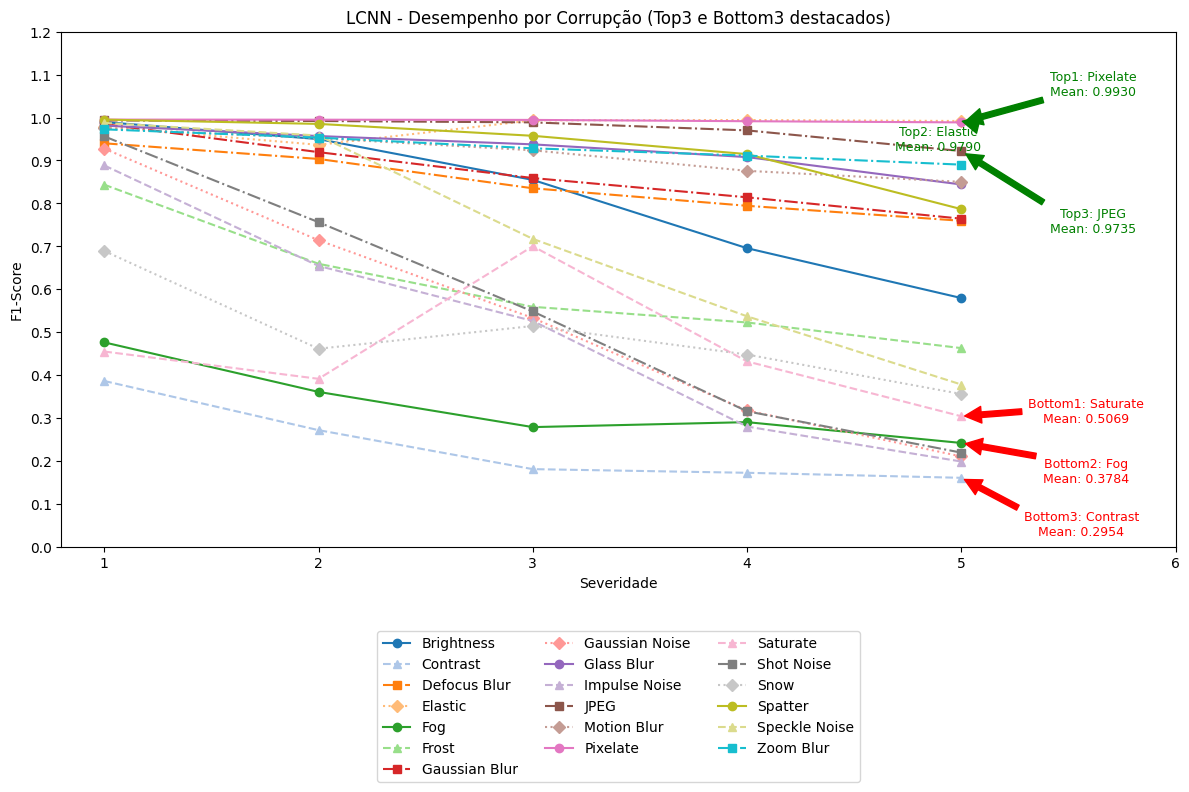

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Caminho do arquivo .xlsx
# caminho_arquivo = r"C:/Users/DESKTOP/pesquisaGabriel/resultadosDasRedes/resultado_final_geral_bancosCorrompidos_ResNet50ModeloEscolhido.xlsx"
caminho_arquivo = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido_VALIDANDO.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['corruption', 'acuracia', 'f1-score']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Criar um novo DataFrame vazio
novodf = pd.DataFrame(columns=['corruption', 'somaDasAcuracia', 'qtdItens'])

# Função para verificar se uma string já existe na coluna 'corruption'
def verifica_corrupcao_existente(df, string):
    return string in df['corruption'].values

def get_prefix_before_severity(text):
    parts = text.split("severity", 1)
    return parts[0].strip()

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    string = get_prefix_before_severity(row['corruption'])
    if verifica_corrupcao_existente(novodf, string):
        novodf.loc[novodf['corruption'] == string, 'somaDasAcuracia'] += row['acuracia']
        novodf.loc[novodf['corruption'] == string, 'qtdItens'] += 1
    else:
        nova_linha = pd.DataFrame({'corruption': [string], 'somaDasAcuracia': [row['acuracia']], 'qtdItens': [1]})
        novodf = pd.concat([novodf, nova_linha], ignore_index=True)

# Criar um novo DataFrame para as médias
novodf2 = pd.DataFrame(columns=['corruption', 'acuraciaMediaDasCorrupcoes'])

# Iterar sobre as linhas do DataFrame
for index, row in novodf.iterrows():
    nova_linha = pd.DataFrame({'corruption': [row['corruption']], 'acuraciaMediaDasCorrupcoes': [row['somaDasAcuracia'] / row['qtdItens']]})
    novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)

# Ordenar o DataFrame pela coluna 'acuraciaMediaDasCorrupcoes' em ordem decrescente
novodf2 = novodf2.sort_values(by='acuraciaMediaDasCorrupcoes', ascending=False)

# Pegar as 3 melhores e as 3 piores corrupções
top_3_melhores = novodf2.head(3)
top_3_piores = novodf2.tail(3)

# Exibir os resultados
print("\n3 melhores corrupções:")
print(top_3_melhores)

print("\n3 piores corrupções:")
print(top_3_piores)

# Criar um DataFrame para o gráfico
novodf_grafico = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame original
for index, row in df.iterrows():
    string = row['corruption']
    parts = string.split()
    corrupcao = ''
    severidade = 0
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])
    novodf_grafico.loc[index] = [corrupcao, severidade, row['f1-score']]

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Lista de cores únicas para as linhas
cores = plt.cm.tab20.colors

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']
markers = ['o', '^', 's', 'D']

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf_grafico.groupby('corruption')):
    group = group.sort_values(by='severidade')
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('LCNN - Desempenho por Corrupção (Top3 e Bottom3 destacados)')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5, 6])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])

# Adicionar a legenda embaixo do gráfico
legenda = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Lista para armazenar as anotações
annotations = []

# Adicionar anotações para as 3 melhores corrupções (Top1, Top2, Top3)
for i, (index, row) in enumerate(top_3_melhores.iterrows(), start=1):
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        annotations.append(plt.annotate(f'Top{i}: {corrupcao}\nMean: {media:.4f}', 
                                        xy=(severidade, f1_score), 
                                        xytext=(severidade + 0.3, f1_score - 0.1), 
                                        arrowprops=dict(facecolor='green', edgecolor='green', shrink=0.05),
                                        fontsize=9, color='green'))

# Adicionar anotações para as 3 piores corrupções (Bottom1, Bottom2, Bottom3)
for i, (index, row) in enumerate(top_3_piores.iterrows(), start=1):
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        annotations.append(plt.annotate(f'Bottom{i}: {corrupcao}\nMean: {media:.4f}', 
                                        xy=(severidade, f1_score), 
                                        xytext=(severidade + 0.2, f1_score - 0.1), 
                                        arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05),
                                        fontsize=9, color='red'))

# Ajustar as anotações para evitar sobreposição
adjust_text(annotations, 
            arrowprops=dict(arrowstyle='->', color='none'), 
            expand_points=(1.5, 1.5),  # Aumenta a distância entre as anotações
            expand_text=(1.2, 1.2),    # Aumenta o espaço ao redor do texto
            force_text=(0.5, 0.5),     # Força o ajuste do texto
            force_points=(0.5, 0.5))   # Força o ajuste dos pontos

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Salvar o gráfico em um arquivo
caminho_grafico = r"C:/Users/DESKTOP/pesquisaGabriel/resultadosDasRedes/grafico_lcnnPcGabi_corrupcoes_VALIDANDO.png"
plt.savefig(caminho_grafico, dpi=500, bbox_inches='tight')  # dpi=300 para alta qualidade
print(f"Gráfico salvo em: {caminho_grafico}")

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_26508\1908136369.py:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_26508\1908136369.py:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




3 melhores corrupções:
   corruption  acuraciaMediaDasCorrupcoes
12   Pixelate                     0.99300
3     Elastic                     0.97900
10       JPEG                     0.97345

3 piores corrupções:
   corruption  acuraciaMediaDasCorrupcoes
13   Saturate                     0.50685
4         Fog                     0.37840
1    Contrast                     0.29545
Gráfico salvo em: C:/Users/DESKTOP/pesquisaGabriel/resultadosDasRedes/grafico_lcnnPcGabi_corrupcoes_versao2_VALIDANDO.png


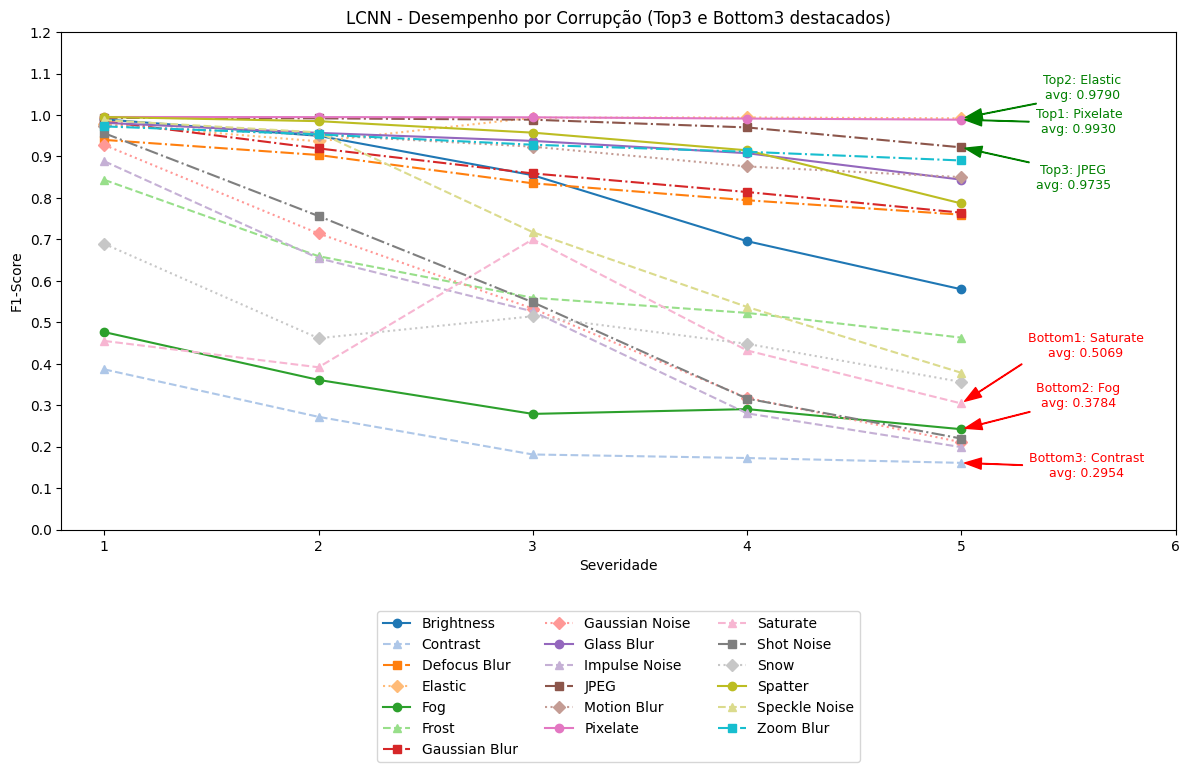

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Caminho do arquivo .xlsx
# caminho_arquivo = r"C:/Users/DESKTOP/pesquisaGabriel/resultadosDasRedes/resultado_final_geral_bancosCorrompidos_ResNet50ModeloEscolhido.xlsx"
caminho_arquivo = r"C:\Users\DESKTOP\pesquisaGabriel\resultadosDasRedes\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido_VALIDANDO.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['corruption', 'acuracia', 'f1-score']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Criar um novo DataFrame vazio
novodf = pd.DataFrame(columns=['corruption', 'somaDasAcuracia', 'qtdItens'])

# Função para verificar se uma string já existe na coluna 'corruption'
def verifica_corrupcao_existente(df, string):
    return string in df['corruption'].values

def get_prefix_before_severity(text):
    parts = text.split("severity", 1)
    return parts[0].strip()

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    string = get_prefix_before_severity(row['corruption'])
    if verifica_corrupcao_existente(novodf, string):
        novodf.loc[novodf['corruption'] == string, 'somaDasAcuracia'] += row['acuracia']
        novodf.loc[novodf['corruption'] == string, 'qtdItens'] += 1
    else:
        nova_linha = pd.DataFrame({'corruption': [string], 'somaDasAcuracia': [row['acuracia']], 'qtdItens': [1]})
        novodf = pd.concat([novodf, nova_linha], ignore_index=True)

# Criar um novo DataFrame para as médias
novodf2 = pd.DataFrame(columns=['corruption', 'acuraciaMediaDasCorrupcoes'])

# Iterar sobre as linhas do DataFrame
for index, row in novodf.iterrows():
    nova_linha = pd.DataFrame({'corruption': [row['corruption']], 'acuraciaMediaDasCorrupcoes': [row['somaDasAcuracia'] / row['qtdItens']]})
    novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)

# Ordenar o DataFrame pela coluna 'acuraciaMediaDasCorrupcoes' em ordem decrescente
novodf2 = novodf2.sort_values(by='acuraciaMediaDasCorrupcoes', ascending=False)

# Pegar as 3 melhores e as 3 piores corrupções
top_3_melhores = novodf2.head(3)
top_3_piores = novodf2.tail(3)

# Exibir os resultados
print("\n3 melhores corrupções:")
print(top_3_melhores)

print("\n3 piores corrupções:")
print(top_3_piores)

# Criar um DataFrame para o gráfico
novodf_grafico = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame original
for index, row in df.iterrows():
    string = row['corruption']
    parts = string.split()
    corrupcao = ''
    severidade = 0
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])
    novodf_grafico.loc[index] = [corrupcao, severidade, row['f1-score']]

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Lista de cores únicas para as linhas
cores = plt.cm.tab20.colors

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']
markers = ['o', '^', 's', 'D']

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf_grafico.groupby('corruption')):
    group = group.sort_values(by='severidade')
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('LCNN - Desempenho por Corrupção (Top3 e Bottom3 destacados)')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5, 6])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])

# Adicionar a legenda embaixo do gráfico
legenda = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Lista para armazenar as anotações
annotations = []

# Adicionar anotações para as 3 melhores corrupções (Top1, Top2, Top3)
for i, (index, row) in enumerate(top_3_melhores.iterrows(), start=1):
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        annotations.append(plt.annotate(f'Top{i}: {corrupcao}\navg: {media:.4f}', 
                                        xy=(severidade, f1_score), 
                                        xytext=(severidade + 0.2, f1_score - 0.05), 
                                        arrowprops=dict(facecolor='green', edgecolor='green', shrink=0.05, width = 0.4, headwidth = 8),
                                        fontsize=9, color='green'))

# Adicionar anotações para as 3 piores corrupções (Bottom1, Bottom2, Bottom3)
for i, (index, row) in enumerate(top_3_piores.iterrows(), start=1):
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        annotations.append(plt.annotate(f'Bottom{i}: {corrupcao}\navg: {media:.4f}', 
                                        xy=(severidade, f1_score), 
                                        xytext=(severidade + 0.2, f1_score + 0.05), 
                                        arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05, width = 0.4, headwidth = 8),
                                        fontsize=9, color='red'))

# Ajustar as anotações para evitar sobreposição
adjust_text(annotations, 
            arrowprops=dict(arrowstyle='->', color='none'), 
            expand_points=(0.0, 0.0),  # Aumenta a distância entre as anotações
            expand_text=(0.0, 0.0),    # Aumenta o espaço ao redor do texto
            force_text=(-5, 2),     # Força o ajuste do texto
            force_points=(0.00, 0.00))   # Força o ajuste dos pontos

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Salvar o gráfico em um arquivo
caminho_grafico = r"C:/Users/DESKTOP/pesquisaGabriel/resultadosDasRedes/grafico_lcnnPcGabi_corrupcoes_versao2_VALIDANDO.png"
plt.savefig(caminho_grafico, dpi=500, bbox_inches='tight')  # dpi=300 para alta qualidade
print(f"Gráfico salvo em: {caminho_grafico}")

# Mostrar o gráfico
plt.show()